В данной лабораторной работе Вы познакомитесь с методом Виолы — Джонса (каскады Хаара) и его реализацией в библиотеке OpenCV.

Задание следующее:
1.   найти любой файл с каскадом для обнаружения объектов, кроме человеческих лиц (например, какие-то файлы каскадов можно найти [тут](https://github.com/opencv/opencv/tree/master/data/haarcascades));
2.   найти 20 изображений, которые содержат объект для обнаружения;
3.   найти 5 изображений, которые НЕ содержат объект для обнаружения;
4.   реализовать функцию, которая обнаруживает объекты на изоборажениях и отрисовывает вокруг них прямоугольные рамочки;
5.   подобрать наилучшие параметры (одинаковые параметры для всех изображений);
6.   провести тестирование.

Для начала Вам предлагается самостоятельно изучить [Метод Виолы — Джонса](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%92%D0%B8%D0%BE%D0%BB%D1%8B_%E2%80%94_%D0%94%D0%B6%D0%BE%D0%BD%D1%81%D0%B0) / [Viola–Jones object detection framework](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework).

Далее посмотрите туториал по использованию [Cascade Classifier](https://docs.opencv.org/5.x/db/d28/tutorial_cascade_classifier.html) и документацию метода [detectMultiScale](https://docs.opencv.org/5.x/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498). Особое внимание обратите на параметры:

* scaleFactor
* minNeighbors
* minSize
* maxSize

Для отрисовки рамочки на изображении Вам пригодится туториал [Drawing Functions in OpenCV](https://docs.opencv.org/5.x/dc/da5/tutorial_py_drawing_functions.html).

Перейдём к реализации.

Для начала вспомогательные импорты и функция для вывода изображений:

In [ ]:
%matplotlib inline
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def show_image(image):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

def get_fpaths(fname: str) -> dict:
  cascade_path = "/Classifiers/" + fname

  images_path = "/Images/"

  images = {"perfect": images_path + "perfect",
            "good": images_path + "good_images",
            "bad": images_path + "bad_images",
            "multiple": images_path + "multiple_images",
            "wrong": images_path + "wrong_images",
            "others": images_path + "other_stuff"}

  res = dict(zip(["cascade", "images"], [cascade_path, images]))

  return res


Далее относительный или абсолютный путь до файла каскада и директории с изображениями:

In [ ]:
paths = get_fpaths("haarcascade_frontalcatface_extended.xml")

cascade_file = paths["cascade"]
images_dir = paths["images"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузим каскад:

In [ ]:
cascade = cv.CascadeClassifier(cascade_file)

Теперь Вам необходимо реализовать функцию, которая обнаруживает объекты и отрисовывает вокруг них рамочки:

In [ ]:
def detect(img, cascade):
  gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Cat faces detection
  cats = cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=6, minSize=(70, 70))
  framed_img = img
  for (x, y, w, h) in cats:
      framed_img = cv.rectangle(framed_img, (x, y), (x + w, y + h), color=(255, 0, 255), thickness=3)

  return framed_img

Осталось только вызвать Вашу функцию для всех изображений и посмотреть на результат:

In [ ]:
def process_files(images_dir: str, cascade):
  for i in os.listdir(images_dir):
    path = os.path.join(images_dir, i)
    if os.path.isfile(path):
      img = cv.imread(path)
      res = detect(img, cascade)
      show_image(res)

  return

### "Идеальные" коты

In [ ]:
process_files(images_dir["perfect"], cascade)

Output hidden; open in https://colab.research.google.com to view.

### "Нормальные" коты

In [ ]:
process_files(images_dir["good"], cascade)

Output hidden; open in https://colab.research.google.com to view.

### Не очень "нормальные" коты

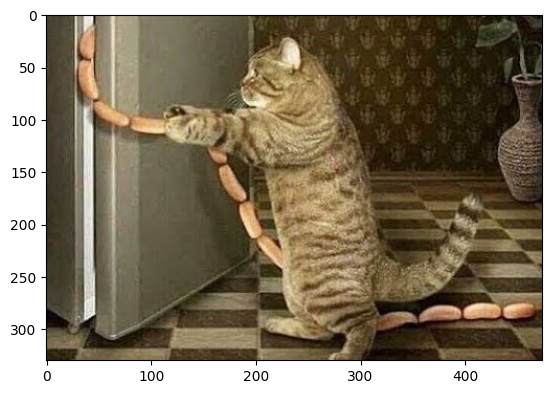

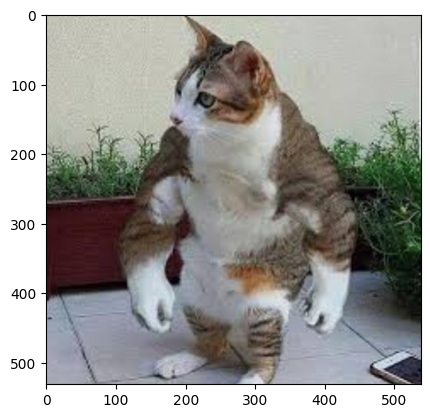

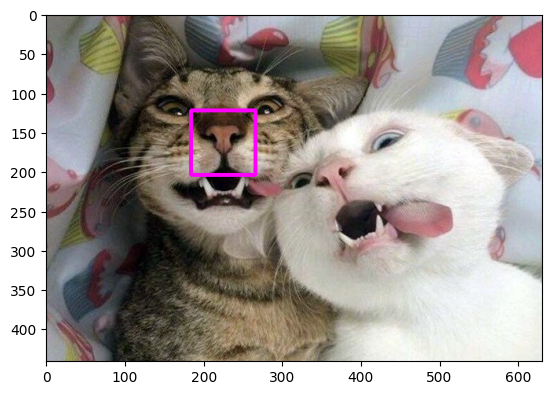

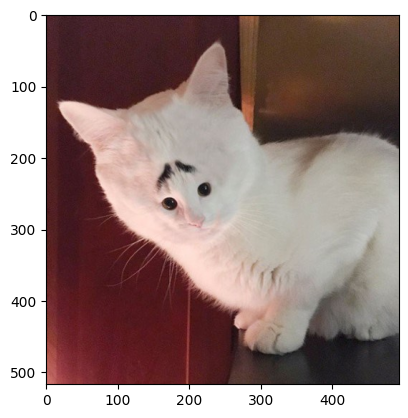

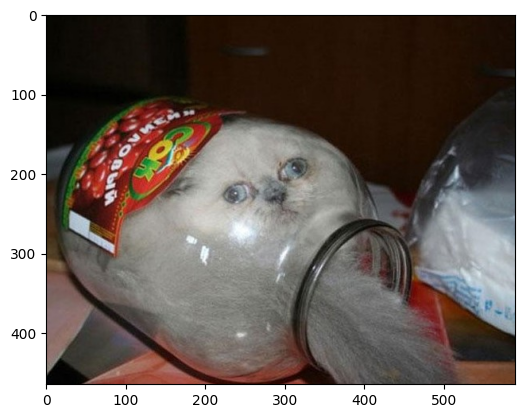

In [ ]:
process_files(images_dir["bad"], cascade)

### Картинки, на которых по несколько котов

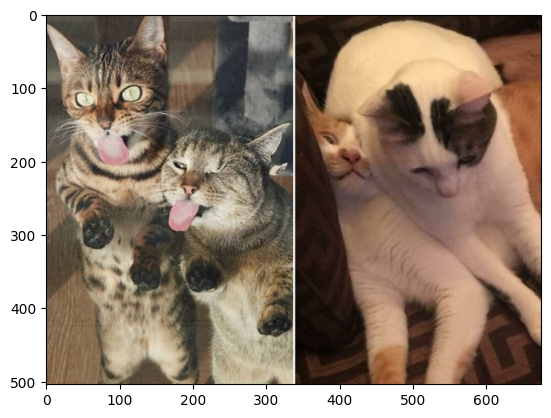

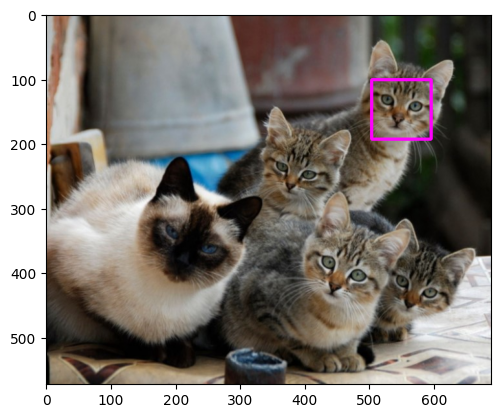

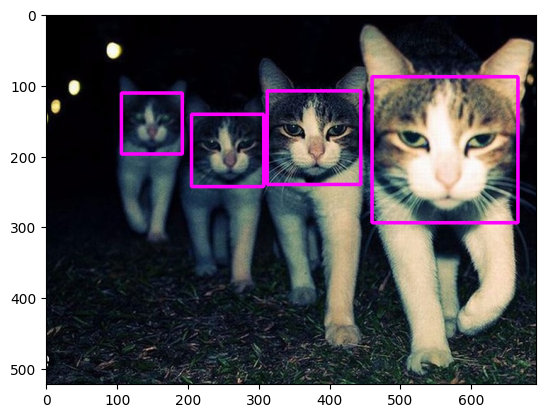

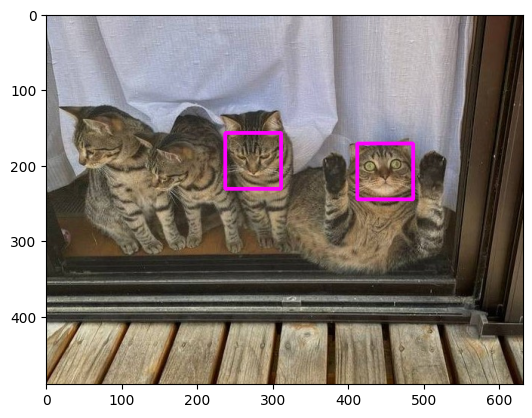

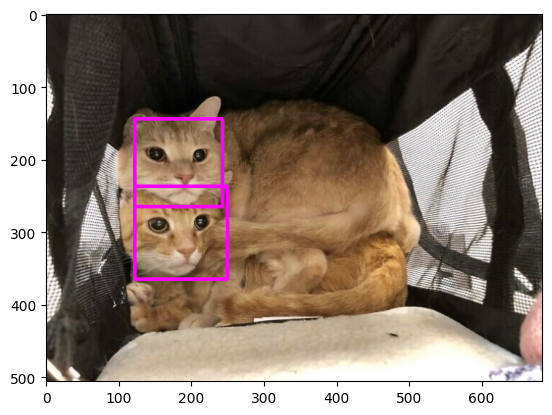

In [ ]:
process_files(images_dir["multiple"], cascade)

### Картинки не с котами

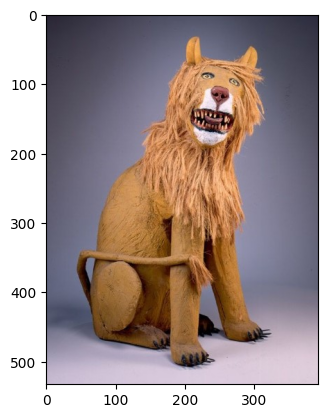

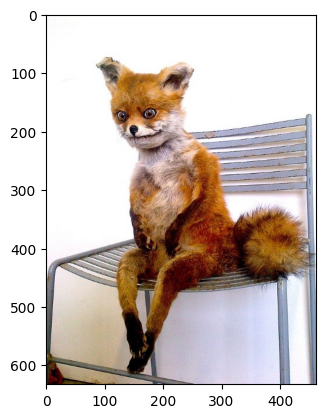

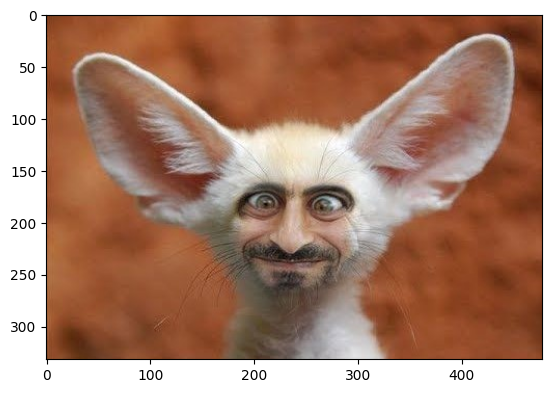

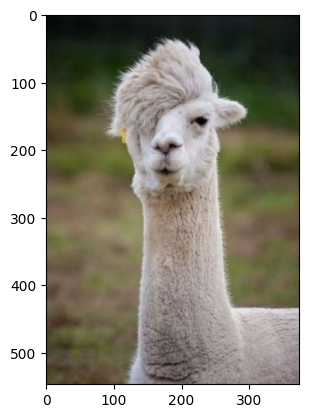

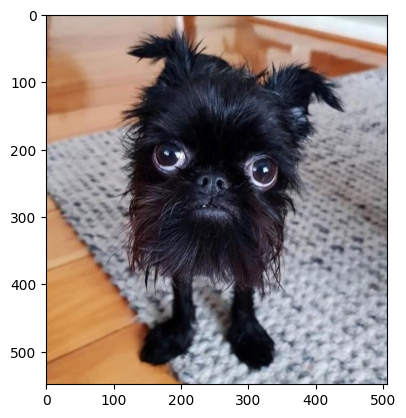

In [ ]:
process_files(images_dir["wrong"], cascade)

Если у Вас некоторые объекты не обнаруживаются или, наоборот, присутствуют ложные срабатывания, попробуйте поиграться с параметрами.

Если всё хорошо, покажите результат работы преподавателю.

### Пейзажи

In [ ]:
process_files(images_dir["others"], cascade)

Output hidden; open in https://colab.research.google.com to view.